In [18]:
%%writefile data_collect.py
import twint

import nest_asyncio
nest_asyncio.apply()

import numpy as np
import pandas as pd



anti_vax_keywords = ['anti vaccine', 'anti vaccination', '#antivax', '#antivaccine', '#antivaxxers', '#novaccine', '#novax']
pc_synonyms = ['considerate', 'diplomatic', 'gender free', 'inclusive', 'inoffensive', 'multicultural', 'multiculturally sensitive', 'politic', 'respectful', 'sensitive', 'sensitive to others', 'bias free', 'liberal', 'nondiscriminatory', 'nonracist', 'nonsexist', 'unbiased', 'political correctness', 'politically correct']

def fetch_by_keywords(keywords_lst, file_path):
    """Fetch tweets by keywords using Twint, and save them as a csv file.
    
    Input:
        keywords_lst(list): a list of keywords
        file_path(str): the path to save the csv file.
        

    """
    
    frame = []
    for keyword in keywords_lst:
        c=twint.Config()
        c.Search= keyword

        c.Pandas= True #Enable Pandas integration.

        c.Limit= 50000

        c.Hide_output = True
        twint.run.Search(c)

        df = twint.storage.panda.Tweets_df
        frame.append(df)
    result = pd.concat(frame)
    
    result[result.language == 'en'].to_csv(file_path)

if __name__ == "__main__":
    fetch_by_keywords(anti_vax_keywords, './antiva_dataset.csv')
    fetch_by_keywords(pc_synonyms, './pc_dataset.csv')


Overwriting data_collect.py


In [8]:
np.__version__

'1.21.2'

In [9]:
twint.__version__

'2.1.21'

In [10]:
pd.__version__

'1.3.4'

In [12]:
nltk.__version__

'3.6.5'

In [13]:
sns.__version__

'0.11.2'

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
import wordcloud

In [16]:
wordcloud.__version__

'1.8.1'

In [19]:
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']

In [20]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [21]:
len(initials)

15

In [22]:
len(sampleCrosstab)

15

In [23]:
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [24]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [26]:
grandTotal = np.sum(sampleCrosstab)
grandTotal

8994

In [35]:
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
correspondenceMatrix

array([[0.0037803 , 0.00411385, 0.00489215, 0.003002  , 0.00211252,
        0.00433622, 0.00822771, 0.00489215, 0.003002  , 0.0067823 ,
        0.00133422, 0.00722704, 0.00767178, 0.00244608, 0.00155659,
        0.00233489],
       [0.00200133, 0.00366911, 0.00522571, 0.00266845, 0.00155659,
        0.00422504, 0.00733823, 0.00455859, 0.00400267, 0.00800534,
        0.00166778, 0.00689348, 0.00700467, 0.00344674, 0.00133422,
        0.00200133],
       [0.00355793, 0.00478097, 0.00400267, 0.00133422, 0.00233489,
        0.00567045, 0.00833889, 0.00366911, 0.00255726, 0.00667111,
        0.00266845, 0.0075606 , 0.00945074, 0.00200133, 0.00144541,
        0.00155659],
       [0.00144541, 0.00344674, 0.00611519, 0.00322437, 0.00166778,
        0.00689348, 0.00822771, 0.00478097, 0.00311319, 0.00811652,
        0.00088948, 0.00655993, 0.006004  , 0.00355793, 0.00211252,
        0.0022237 ],
       [0.00088948, 0.00311319, 0.0037803 , 0.00266845, 0.00189015,
        0.0075606 , 0.00833889, 

In [36]:
rowTotals = np.sum(correspondenceMatrix, axis=1)
rowTotals

array([0.06771181, 0.06559929, 0.06760062, 0.06837892, 0.06482099,
       0.06860129, 0.06537692, 0.06482099, 0.06470981, 0.0670447 ,
       0.06726707, 0.06671114, 0.06737825, 0.06682233, 0.06715588])

In [37]:
columnTotals = np.sum(correspondenceMatrix, axis=0)
columnTotals

array([0.02879698, 0.04436291, 0.07727374, 0.0369135 , 0.0309095 ,
       0.09695352, 0.11830109, 0.05859462, 0.04792084, 0.11763398,
       0.02646209, 0.09906604, 0.11029575, 0.04091617, 0.03646876,
       0.02913053])

In [39]:
independenceModel = np.outer(rowTotals, columnTotals)
independenceModel

array([[0.0019499 , 0.00300389, 0.00523234, 0.00249948, 0.00209294,
        0.0065649 , 0.00801038, 0.00396755, 0.00324481, 0.00796521,
        0.0017918 , 0.00670794, 0.00746832, 0.00277051, 0.00246937,
        0.00197248],
       [0.00188906, 0.00291018, 0.0050691 , 0.0024215 , 0.00202764,
        0.00636008, 0.00776047, 0.00384377, 0.00314357, 0.00771671,
        0.00173589, 0.00649866, 0.00723532, 0.00268407, 0.00239232,
        0.00191094],
       [0.00194669, 0.00299896, 0.00522375, 0.00249538, 0.0020895 ,
        0.00655412, 0.00799723, 0.00396103, 0.00323948, 0.00795213,
        0.00178885, 0.00669693, 0.00745606, 0.00276596, 0.00246531,
        0.00196924],
       [0.00196911, 0.00303349, 0.00528389, 0.00252411, 0.00211356,
        0.00662958, 0.0080893 , 0.00400664, 0.00327677, 0.00804368,
        0.00180945, 0.00677403, 0.0075419 , 0.0027978 , 0.00249369,
        0.00199191],
       [0.00186665, 0.00287565, 0.00500896, 0.00239277, 0.00200358,
        0.00628462, 0.00766839, 

In [ ]:
grandTotal = np.sum(sampleCrosstab)
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
 
independenceModel = np.outer(rowTotals, columnTotals)
 
#Calculate manually
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)
 
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

In [2]:
import numpy as np
import pandas as pd 

import seaborn as sn
import matplotlib.pylab as plt 
%matplotlib inline


import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
import re 

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from contractions import contractions_dict

import scipy
from scipy import sparse

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_with_solutions.csv')

In [4]:
train.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [5]:
test.head()

,Insult,Date,Comment,Usage
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest


In [6]:
train_comment = train['Comment']
test_comment = test['Comment']
train_label = train['Insult']
test_label = test['Insult']

In [7]:
train_comment.shape

(3947,)

In [8]:
test_comment.shape

(2647,)

In [9]:
Data_to_clean = pd.concat([train_comment,test_comment],axis=0)
Data_to_clean.shape

(6594,)

In [61]:
contract_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [66]:
pip install contractions

     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/287.5 KB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 286.7/287.5 KB 9.4 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from contractions import contractions_dict

In [69]:
len(contractions_dict)

343

In [71]:
contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [11]:
def remove_characters_before_tokenization(text):
    text = text.strip()
    return re.sub(r'[^a-zA-Z0-9\' ]', r'', text)

In [189]:
Data_to_clean1[2]

"Axc2xa0majority of Canadians can and has been wrong before now and will be againnnUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime  and sorry butxc2xa0the cheques in the mail "

In [12]:
Data_to_clean1 = [remove_characters_before_tokenization(i) for i in Data_to_clean]

In [13]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

"""def expand_match(contraction):
        
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contractions_dict.get(match)\
                           if contractions_dict.get(match)\
                           else contractions_dict.get(match.lower())
    expanded_contraction = first_char+expanded_contraction[1:]
    return expanded_contraction"""

def expand_contractions(sentence, contractions_dict):

    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match)\
                               if contractions_dict.get(match)\
                               else contractions_dict.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence

In [14]:
stopword_list = nltk.corpus.stopwords.words('english')

In [15]:
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [16]:
def expand_contra(sentence, contractions_dict):
    contras = re.findall(r'\w+\'\w+', sentence)
    for i in contras:
        expanded_contraction = contractions_dict.get(i)\
                               if contractions_dict.get(i)\
                               else contractions_dict.get(i.lower())
        if expanded_contraction:
            sentence = re.sub(i, expanded_contraction, sentence)
    return sentence
        

In [17]:
def normalize_corpus(corpus, tokenize=False):
    normalized_corpus = []
    for index, text in enumerate(corpus):
        try:
            text = expand_contra(text, contractions_dict)
        except:
            print(index)
        text = remove_stopwords(text)
        normalized_corpus.append(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
    return normalized_corpus

In [18]:
normalized_data = normalize_corpus(corpus=Data_to_clean1,tokenize=False)

In [19]:
normalized_data

['You fuck dad',
 'really understand pointxa0 It seems mixing apples oranges',
 "Axc2xa0majority Canadians wrong againnnUnless supportive idea nothing full proof perfect take chances inadvertently kill son daughter 's breaks always regard collateral damage like wartime sorry butxc2xa0the cheques mail",
 'listen dont wan na get married man women DONT DO IT would bother gay people got married stay lane let And god nice quick judg like thought wasnt suppose judge people',
 'Cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1ec3u txecnh 2011 cxf3 xf4n hoxe0 khxf4ng nCxe1c ngu01b0 dxe2n ngu1ed3i cuxed u0111u1ea7u chiu1ee5 nhu1ee5c cxf3 xf4n hoxe0 khxf4ng nCxe1c nxf4ng dxe2n giu1eef u0111u1ea5t u1edf Vu0103n Giang Cu1ea7n Thu01a1 cxf3 xf4n hoxe0 khxf4ng nnRu1ed1t cuu1ed9c u0111u01b0u1ee3c gxecxa0 thxec chxfang ta u0111xe3 biu1ebft nAi cu0169ng yxeau chuu1ed9ng hoxe0 bxecnh nhu01b0ng u0111xf4i khi hoxe0 bxecnh chu1ec9 thu1eadt su1ef1 u0111u1ebfn sau chiu1ebfn tranh mxe0 thxf4inKhxf4ng cxf2n con u0

In [20]:
train_corpus = normalized_data[:3947]
test_corpus = normalized_data[3947:]

In [21]:
def feat_extract(data,ngram_range):
    vectorizer = CountVectorizer(min_df=1,ngram_range=ngram_range)
    feature = vectorizer.fit_transform(data)
    return(vectorizer,feature)

train_vec,train_feat = feat_extract(data=train_corpus,ngram_range=(1,3))

In [22]:
test_feat = train_vec.transform(test_corpus)

In [23]:
train_features = train_feat.todense()
test_features = test_feat.todense()

In [20]:
train_features.shape, test_features.shape

((3947, 144452), (2647, 144452))

In [24]:
def tfidf_transformer(matrix):
    transform = TfidfTransformer(norm='l2',smooth_idf=True,use_idf=True)
    tfidf_matrix = transform.fit_transform(matrix)
    
    return(transform, tfidf_matrix)

In [25]:
train_transform , train_matrix = tfidf_transformer(train_features)

train_final_feature = train_matrix.todense()

/Library/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/Library/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [26]:
test_final_feature = train_transform.transform(test_features).todense()

/Library/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [27]:
X_training,X_testing=sparse.csr_matrix(train_final_feature),sparse.csr_matrix(test_final_feature)

In [215]:
X_training.shape

(3947, 144452)

In [219]:
train_label.shape

(3947,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB

In [217]:
NB = MultinomialNB()

In [220]:
NB.fit(X=X_training,y=train_label)

cross_val_score(estimator=NB,X=X_testing,y=test_label,cv=5)

NB_pred = NB.predict(X_testing)

print(accuracy_score(y_true=test_label,y_pred=NB_pred))
      

print(accuracy_score(y_true=test_label,y_pred=NB_pred),"Accuracy")

print(f1_score(y_true=test_label,y_pred=NB_pred,average='weighted'),"F1_score")

print(recall_score(y_true=test_label,y_pred=NB_pred,average='weighted'),"recall_score/sensitivity")

print(precision_score(y_true=test_label,y_pred=NB_pred,average='weighted'),"precision_score")

0.7555723460521345
0.7555723460521345 Accuracy
0.6665052911750317 F1_score
0.7555723460521345 recall_score/sensitivity
0.8110622794097232 precision_score


In [49]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss='log')

SGD.fit(X=X_training,y=train_label)

cross_val_score(estimator=SGD,X=X_testing,y=test_label,cv=5)

SGD_pred = SGD.predict(X_testing)

print(accuracy_score(y_true=test_label,y_pred=SGD_pred))
      

print(accuracy_score(y_true=test_label,y_pred=SGD_pred),"Accuracy")

print(f1_score(y_true=test_label,y_pred=SGD_pred,average='weighted'),"F1_score")

print(recall_score(y_true=test_label,y_pred=SGD_pred,average='weighted'),"recall_score/sensitivity")

print(precision_score(y_true=test_label,y_pred=SGD_pred,average='weighted'),"precision_score")

0.8250850018889309
0.8250850018889309 Accuracy
0.80774006032382 F1_score
0.8250850018889309 recall_score/sensitivity
0.8201840648379932 precision_score


In [31]:
def metric(clf, X_test, y_test):
    cross_val_score(estimator=clf,X=X_test,y=y_test,cv=5)
    y_pred = clf.predict(X_test)
    
    print(cross_val_score(estimator=clf,X=X_test,y=y_test,cv=5), "cross_val_score")
    
    print(accuracy_score(y_true=y_test,y_pred=y_pred), "Accuracy")

    print(f1_score(y_true=y_test,y_pred=y_pred,average='weighted'),"F1_score")

    print(recall_score(y_true=y_test,y_pred=y_pred,average='weighted'),"recall_score/sensitivity")

    print(precision_score(y_true=y_test,y_pred=y_pred,average='weighted'),"precision_score")
    
    return y_pred

In [44]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=0).fit(X=X_training,y=train_label)




In [234]:
metric(LogReg, X_testing, test_label)

[0.78301887 0.80754717 0.78827977 0.78827977 0.78071834] cross_val_score
0.8114846996599925 Accuracy
0.7797702967189972 F1_score
0.8114846996599925 recall_score/sensitivity
0.8189941929725858 precision_score


array([0, 0, 1, ..., 0, 0, 0])

In [227]:
LogReg.predict_proba(X_testing)

array([[0.84136933, 0.15863067],
       [0.71880028, 0.28119972],
       [0.42264694, 0.57735306],
       ...,
       [0.79112236, 0.20887764],
       [0.65102394, 0.34897606],
       [0.80561888, 0.19438112]])

In [228]:
metric(SGD, X_testing, test_label)

0.8156403475632792 Accuracy
0.8123592336522836 F1_score
0.8156403475632792 recall_score/sensitivity
0.8104140776043635 precision_score


array([0, 0, 1, ..., 0, 1, 0])

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0).fit(X=X_training,y=train_label)

In [30]:
metric(GB, X_testing, test_label)

NameError: name 'metric' is not defined

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0).fit(X=X_training,y=train_label)

In [28]:
metric(RF, X_testing, test_label)

[0.76981132 0.79245283 0.78449905 0.76748582 0.77882798] cross_val_score
0.8190404231205138 Accuracy
0.80006217955237 F1_score
0.8190404231205138 recall_score/sensitivity
0.8131986770782436 precision_score


array([0, 0, 1, ..., 0, 0, 0])

In [235]:
d = {'a': [1,2,3], 'b': [2,3,4], 'c': [3,4,5]}

In [236]:
d

{'a': [1, 2, 3], 'b': [2, 3, 4], 'c': [3, 4, 5]}

In [239]:
pd.DataFrame(d, index=['e', 'f', 'g'])

,a,b,c
e,1,2,3
f,2,3,4
g,3,4,5


In [53]:
def metrics(clf_lst, X_test, y_test):
    
    metrics = []
    for clf in clf_lst:
        metrics_lst = []
        cross_val_score(estimator=clf,X=X_test,y=y_test,cv=5)
        y_pred = clf.predict(X_test)
        metrics_lst.append(accuracy_score(y_true=y_test,y_pred=y_pred))
        metrics_lst.append(f1_score(y_true=y_test,y_pred=y_pred,average='weighted'))
        metrics_lst.append(recall_score(y_true=y_test,y_pred=y_pred,average='weighted'))
        metrics_lst.append(precision_score(y_true=y_test,y_pred=y_pred,average='weighted'))
        
        metrics.append(metrics_lst)
    return metrics

In [71]:
classifiers_lst = []

NB = MultinomialNB()
NB.fit(X=X_training,y=train_label)
classifiers_lst.append(NB)

SGD = SGDClassifier(loss='log')
SGD.fit(X=X_training,y=train_label)
classifiers_lst.append(SGD)

LogReg = LogisticRegression()
LogReg.fit(X=X_training,y=train_label)
classifiers_lst.append(LogReg)

GB = GradientBoostingClassifier()
GB.fit(X=X_training,y=train_label)
classifiers_lst.append(GB)

RF = RandomForestClassifier()
RF.fit(X=X_training,y=train_label)
classifiers_lst.append(RF)

metrics_dict = metrics(classifiers_lst, X_testing, test_label)  


In [247]:
metrics_dict = metrics(classifiers_lst, X_testing, test_label)

In [249]:
pd.DataFrame(metrics_dict)

,0,1,2,3
0,0.755572,0.666505,0.755572,0.811062
1,0.815640,0.812154,0.815640,0.810165
2,0.811485,0.779770,0.811485,0.818994
3,0.812996,0.795830,0.812996,0.803682
4,0.819796,0.802597,0.819796,0.812784


In [56]:
pip install dataframe-image --quiet

Note: you may need to restart the kernel to use updated packages.


In [57]:
import dataframe_image as dfi

In [59]:
dfi.__version__

'0.1.1'

In [58]:
df = pd.DataFrame(metrics_dict, 
             columns=['Accuracy', 'F1_score', 'recall_score', 'precision_score'], 
             index = ['Naive Bayes', "SGD", "Logistic Regression", 'GradientBoosting', 'RandomForest'])
dfi.export(df, 'clf_metrics.png')



[0425/004029.099140:INFO:headless_shell.cc(659)] Written to file /var/folders/nz/jn46yvw155q0l_6bpm5shgdc0000gn/T/tmpwfgy6cc1/temp.png.


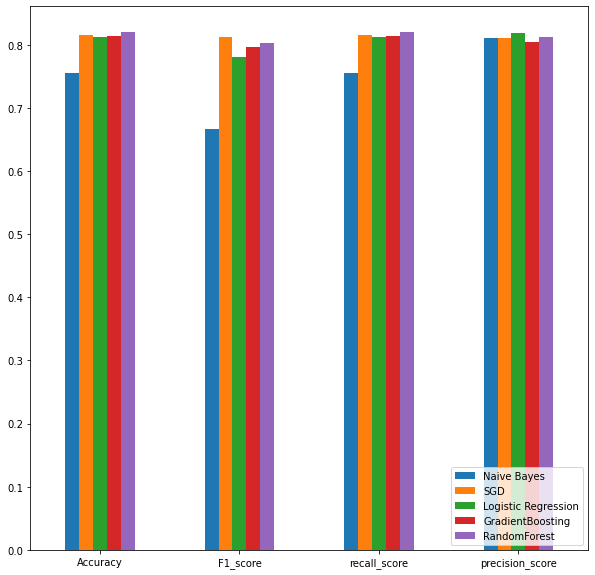

In [264]:
df.T.plot(kind='bar', figsize = (10, 10), )
plt.xticks(rotation=360)
plt.legend(loc='lower right')
plt.savefig('clf_metrics.png')

In [34]:
anti_vac = pd.read_csv('antiva_dataset.csv')

In [35]:
anti_vac.iloc[:,20:26].describe()

,video,nlikes,nreplies,nretweets
count,9432.000000,9432.000000,9432.000000,9432.000000
mean,0.137935,14.447413,1.982082,2.673770
std,0.344850,613.173146,59.754165,107.621273
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,0.000000
max,1.000000,59099.000000,5647.000000,10325.000000


In [36]:
a = anti_vac[anti_vac.nlikes < 200]

In [120]:
a.iloc[:, 20:29].describe()

,video,nlikes,nreplies,nretweets,near
count,9372.000000,9372.000000,9372.000000,9372.000000,0.0
mean,0.136684,4.398848,1.032224,0.854673,NaN
std,0.343531,15.181431,4.334586,4.209690,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,2.000000,1.000000,0.000000,NaN
max,1.000000,199.000000,173.000000,120.000000,NaN


In [38]:
data_tweet = a['tweet']

In [267]:
import utils

In [39]:
Data_to_clean1 = [remove_characters_before_tokenization(i) for i in data_tweet]
normalized_data = normalize_corpus(corpus=Data_to_clean1,tokenize=False)

In [40]:
data_features = train_vec.transform(normalized_data).todense()
data_final_feature = train_transform.transform(data_features).todense()

final_data = sparse.csr_matrix(data_final_feature)

/Library/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [41]:
from collections import Counter

In [75]:
Counter(RF.predict(final_data))

Counter({0: 9152, 1: 220})

In [42]:
Counter(GB.predict(final_data))

Counter({0: 9159, 1: 213})

In [73]:
Counter(SGD.predict(final_data))

Counter({0: 9290, 1: 82})

In [61]:
RF.predict_proba(final_data)[:, 1]

array([0.23666667, 0.39840079, 0.        , ..., 0.119     , 0.18118651,
       0.3025    ])

In [46]:
LogReg.predict(final_data)

Counter({0: 9398, 1: 34})

In [44]:
import seaborn as sns

/Library/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


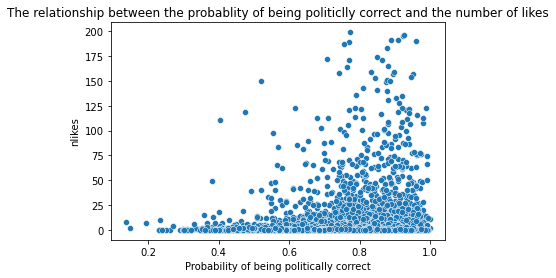

In [100]:
sns.scatterplot(RF.predict_proba(final_data)[:, 0], a['nlikes'])
plt.xlabel('Probability of being politically correct');
plt.title('The relationship between the probablity of being politiclly correct and the number of likes')
plt.savefig('ralation_nlikes.png')

/Library/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


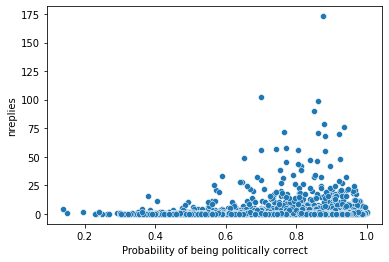

In [98]:
sns.scatterplot(RF.predict_proba(final_data)[:, 0], a['nreplies'])
plt.xlabel('Probability of being politically correct');
plt.savefig('ralation_nreplies.png')

/Library/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


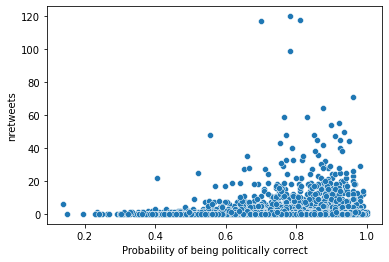

In [99]:
sns.scatterplot(RF.predict_proba(final_data)[:, 0], a['nretweets'])
plt.xlabel('Probability of being politically correct');
plt.savefig('ralation_nretweets.png')

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
anti_vac.iloc[:, 23:26]

,nlikes,nreplies,nretweets
0,2,1,0
1,0,0,0
2,11,1,0
3,1,0,0
4,3,0,2
...,...,...,...
9427,0,0,0
9428,0,0,0
9429,1,0,1
9430,0,1,0


In [113]:
scaler = MinMaxScaler(feature_range=(0,10))

In [1]:
scaler.fit_transform(anti_vac.iloc[:, 23:26])

NameError: name 'scaler' is not defined

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests

In [50]:
grangercausalitytests(GB.predict_proba(final_data)[:, 1], a['nretweets'], maxlag=[3])

TypeError: grangercausalitytests() got multiple values for argument 'maxlag'

In [81]:
df1= pd.read_csv('pc_dataset.csv', index_col=0)
df1.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,text_tokens,text_lemmas
0,1515461690023886854,1515446982411759627,1.650149e+12,2022-04-16 17:46:37,-500,NaN,@eunique She's such a considerate Princess 😍,en,[],[],...,NaN,NaN,NaN,"[{'screen_name': 'eunique', 'name': 'Eunique’s...",NaN,NaN,NaN,NaN,"['eunique', 'shes', 'princess']","['eunique', ""'s"", 'princess', '😍']"
1,1515461598428639235,1515461598428639235,1.650149e+12,2022-04-16 17:46:15,-500,NaN,"Aw, Anya is such a little sweetheart, kid her ...",en,"['spy_family', 'spyxfamily']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"['anya', 'little', 'sweetheart', 'kid', 'age',...","['aw', 'anya', 'little', 'sweetheart', 'kid', ..."
2,1515461598021926917,1515461598021926917,1.650149e+12,2022-04-16 17:46:15,-500,NaN,considerate central vacuum cleaner makes you p...,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"['central', 'vacuum', 'cleaner', 'makes', 'pla...","['central', 'vacuum', 'cleaner', 'make', 'plas..."
3,1515461571106861058,1515455205428453383,1.650149e+12,2022-04-16 17:46:09,-500,NaN,@Etna_Crimson Just thought about this cuz how ...,en,[],[],...,NaN,NaN,NaN,"[{'screen_name': 'Etna_Crimson', 'name': 'Etna...",NaN,NaN,NaN,NaN,"['etnacrimson', 'thought', 'cuz', 'low', 'voic...","['etna_crimson', 'thought', 'cuz', 'low', 'ur'..."
5,1515461132298956808,1515317030894854146,1.650149e+12,2022-04-16 17:44:24,-500,NaN,@DCDoc33 But some people understand it for wha...,en,[],[],...,NaN,NaN,NaN,"[{'screen_name': 'DCDoc33', 'name': 'Ida Bergs...",NaN,NaN,NaN,NaN,"['dcdoc33', 'people', 'understand', 'encourage...","['dcdoc33', 'people', 'understand', 'encourage..."


In [83]:
df1['tweet']

0          @eunique She's such a considerate Princess 😍
1     Aw, Anya is such a little sweetheart, kid her ...
2     considerate central vacuum cleaner makes you p...
3     @Etna_Crimson Just thought about this cuz how ...
5     @DCDoc33 But some people understand it for wha...
                            ...                        
95    @ilario82 @olgatokariuk Is putin himself killi...
96    A little politically correct Final Four @Aubur...
97    @mikeyk1964 @scrowder I have spent a large por...
98    @kevin_msipha I said its democratically unwise...
99    @Emiem #Emimem I think there was a letter sent...
Name: tweet, Length: 1323, dtype: object

In [85]:
import utils

In [90]:
from wordcloud import WordCloud, STOPWORDS
import string

In [86]:
data = [utils.remove_characters_before_tokenization(i) for i in df1['tweet']]
data1= utils.normalize_corpus(corpus=data,tokenize=False)

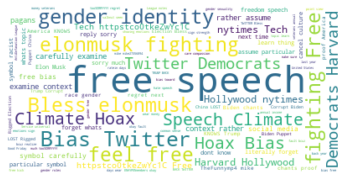

In [95]:
text = " ".join(review for review in data1)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(list(string.punctuation) + ["https", "people", 'think', 'will', 's', 'others', "one", "politically correct", "politically", "correct", "political correctness", "political", "correctness", "sensitive", 'covid','covid-19', 'covid19', "vaccines", 'vaxxer', 'vaxxers', 't', 'co', 'pandemic', 'anti-vaccine', 'amp'] + ['considerate', 'diplomatic', 'gender free', 'inclusive', 'inoffensive', 'multicultural', 'multiculturally sensitive', 'politic', 'respectful', 'sensitive', 'sensitive to others', 'bias free', 'liberal', 'nondiscriminatory', 'nonracist', 'nonsexist', 'unbiased', 'political correctness', 'politically correct'])



wordcloud = WordCloud(stopwords=stopwords, background_color="white", min_word_length=4, collocation_threshold=4).generate_from_text(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('pc_wordcloud.png')